In [1]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/HR_Employee_MissingValuesFilled.csv") 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,19.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,NaN,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,NaN,0,12,1.0,3,3.0,7,0,7
4,53.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,NaN,3,10.0,2,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   object 
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   object 
 14  JobSatis

<AxesSubplot:>

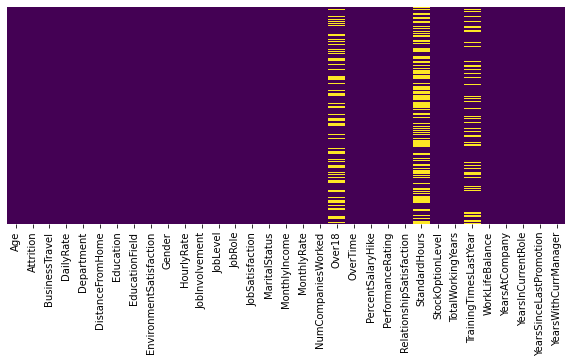

In [4]:
plt.figure(figsize =(10, 4)) 
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:xlabel='Attrition', ylabel='count'>

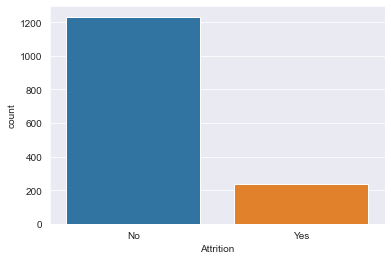

In [6]:
sns.set_style('darkgrid') 
sns.countplot(x ='Attrition', data = df) 

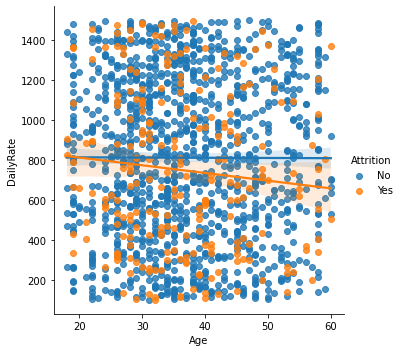

In [5]:
sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df) 

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

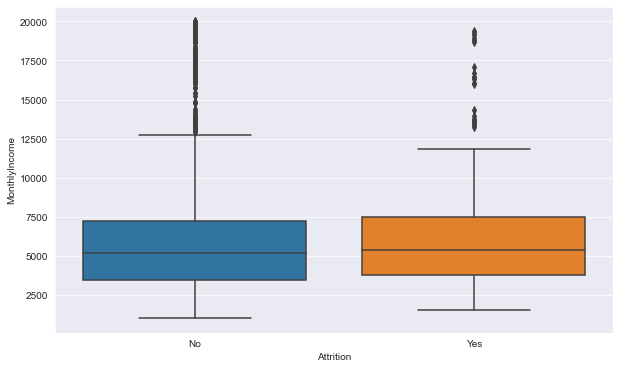

In [7]:
plt.figure(figsize =(10, 6)) 
sns.boxplot(y ='MonthlyIncome', x ='Attrition', data = df)

In [8]:
to_discard = ['Over18','StandardHours','TrainingTimesLastYear']
to_df = [col for col in df.columns if col not in to_discard]
df=df[to_df]

In [9]:
y = df.iloc[:, 1] 
X = df 
X.drop('Attrition', axis = 1, inplace = True) 

In [10]:
from sklearn.preprocessing import LabelEncoder 
lb = LabelEncoder() 
y = lb.fit_transform(y) 

In [11]:
dum_BusinessTravel = pd.get_dummies(df['BusinessTravel'],  
                                    prefix ='BusinessTravel') 
dum_Department = pd.get_dummies(df['Department'],  
                                prefix ='Department') 
dum_EducationField = pd.get_dummies(df['EducationField'],  
                                    prefix ='EducationField') 
dum_Gender = pd.get_dummies(df['Gender'],  
                            prefix ='Gender', drop_first = True) 
dum_JobRole = pd.get_dummies(df['JobRole'],  
                             prefix ='JobRole') 
dum_MaritalStatus = pd.get_dummies(df['MaritalStatus'],  
                                   prefix ='MaritalStatus') 
dum_OverTime = pd.get_dummies(df['OverTime'],  
                              prefix ='OverTime', drop_first = True) 
# Adding these dummy variable to input X 
X = pd.concat([X, dum_BusinessTravel, dum_Department,  
               dum_EducationField, dum_Gender, dum_JobRole,  
               dum_MaritalStatus, dum_OverTime], axis = 1) 
# Removing the categorical data 
X.drop(['BusinessTravel', 'Department', 'EducationField',  
        'Gender', 'JobRole', 'MaritalStatus', 'OverTime'],  
        axis = 1, inplace = True) 
  
print(X.shape) 
print(y.shape) 

(1470, 48)
(1470,)


In [12]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size = 0.25, random_state = 40)

The optimal number of neighbors is  17 


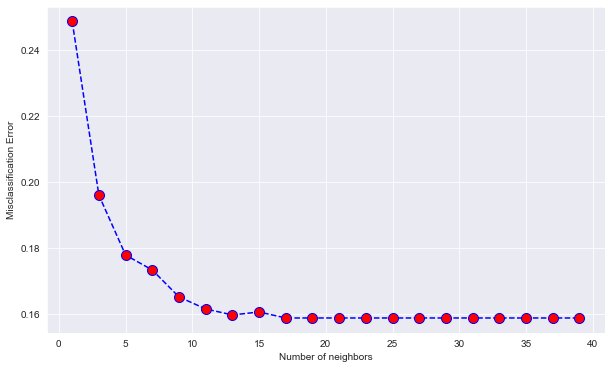

In [13]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
neighbors = []  
cv_scores = [] 
# perform 10 fold cross validation  
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(  
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show()  

In [14]:
from sklearn.model_selection import cross_val_predict, cross_val_score 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import confusion_matrix 
  
def print_score(clf, X_train, y_train, X_test, y_test, train = True): 
    if train: 
        print("Train Result:") 
        print("------------") 
        print("Classification Report: \n {}\n".format(classification_report( 
                y_train, clf.predict(X_train)))) 
        print("Confusion Matrix: \n {}\n".format(confusion_matrix( 
                y_train, clf.predict(X_train)))) 
  
        res = cross_val_score(clf, X_train, y_train,  
                              cv = 10, scoring ='accuracy') 
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res))) 
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res))) 
        print("accuracy score: {0:.4f}\n".format(accuracy_score( 
                y_train, clf.predict(X_train)))) 
        print("----------------------------------------------------------") 
                 
    elif train == False: 
        print("Test Result:") 
        print("-----------") 
        print("Classification Report: \n {}\n".format( 
                classification_report(y_test, clf.predict(X_test)))) 
        print("Confusion Matrix: \n {}\n".format( 
                confusion_matrix(y_test, clf.predict(X_test))))  
        print("accuracy score: {0:.4f}\n".format( 
                accuracy_score(y_test, clf.predict(X_test)))) 
        print("-----------------------------------------------------------") 

In [15]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       927
           1       0.56      0.10      0.17       175

    accuracy                           0.84      1102
   macro avg       0.71      0.54      0.54      1102
weighted avg       0.81      0.84      0.80      1102


Confusion Matrix: 
 [[913  14]
 [157  18]]

Average Accuracy: 	 0.8267
Accuracy SD: 		 0.0118
accuracy score: 0.8448

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       306
           1       0.10      0.02      0.03        62

    accuracy                           0.81       368
   macro avg       0.46      0.49      0.46       368
weighted avg       0.71      0.81      0.75       368


Confusion Matrix: 
 [[297   9]
 [ 61   1]]

accuracy score: 0.809

In [16]:
knn = KNeighborsClassifier(n_neighbors = 17) 
knn.fit(X_train, y_train) 
print_score(knn, X_train, y_train, X_test, y_test, train = True) 
print_score(knn, X_train, y_train, X_test, y_test, train = False) 

Train Result:
------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       927
           1       1.00      0.01      0.01       175

    accuracy                           0.84      1102
   macro avg       0.92      0.50      0.46      1102
weighted avg       0.87      0.84      0.77      1102


Confusion Matrix: 
 [[927   0]
 [174   1]]

Average Accuracy: 	 0.8412
Accuracy SD: 		 0.0043
accuracy score: 0.8421

----------------------------------------------------------
Test Result:
-----------
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       306
           1       0.00      0.00      0.00        62

    accuracy                           0.83       368
   macro avg       0.42      0.50      0.45       368
weighted avg       0.69      0.83      0.76       368


Confusion Matrix: 
 [[306   0]
 [ 62   0]]

accuracy score: 0.831

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
